<a href="https://colab.research.google.com/github/haligene109/Eugen/blob/main/Image_Segmentation_with_Mask_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


* Perform image segmentation using Mask R-CNN
* Clone from other repository (https://github.com/alsombra/Mask_RCNN-TF2)
* Change from Mask_RCNN (folder name) to Mask_RCNN-TF2
* Add compatibility code (the 5 lines under the title "[ ! ] Compatibility Update")
* Remove the commands that downgrade h5py and tensorflow (they are already removed from this Colab)

## First, download and clone the Mask R-CNN repository from GitHub.

This repository has utilities, images and functions required for image segmentation

In [12]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2  # updated repository

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004
Receiving objects: 100% (1004/1004), 137.72 MiB | 23.56 MiB/s, done.
Resolving deltas: 100% (588/588), done.


# If you click on folder to the left of your colab notebook, you will find a folder, Mask_RCNN-FT2

# Observe the setup.py file. If you check on setup, you should see that mask-rcnn is the name of our installation.

In [13]:
%cd Mask_RCNN-TF2

/content/Mask_RCNN-TF2/Mask_RCNN-TF2


# Check the directory you are in with pwd command

In [16]:
pwd

'/content/Mask_RCNN-TF2/Mask_RCNN-TF2'

# requirements.txt is a file that contains a list of packages or libraries needed to work on a project that can all be installed with the file. We need this file installed because installation of the setup file. There was an error prior to this installation. Installing this file solved the problem encountered during the installation of setup file. Use **!pip install -r requirements.txt command**

In [19]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.1/298.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.0 MB/s eta 0:00:00


# Install the set up file

In [20]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separ

# You can see on the third line from bottom-up that mask_rcnn is installed

# Go to the last directory

In [24]:
%cd ..

/content


# We are in the content directory

In [25]:
pwd

'/content'

## Importing the libraries

In [26]:
import os
import cv2
import sys
import numpy as np
from google.colab.patches import cv2_imshow
import skimage.io
import matplotlib.pyplot as plt

In [29]:
import tensorflow as tf
# We need this library because Mask RCNN is based on tensorflow

# Create a root director, ROOT_DIR. **abspath** takes a string containing a filesystem path and converts it to an absolute path

In [34]:
ROOT_DIR = os.path.abspath('./Mask_RCNN-TF2')
ROOT_DIR

'/content/Mask_RCNN-TF2'

In [35]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [41]:
# add to the system path the name of the file that we want to import, ROOT_DIR

In [36]:
sys.path.append(ROOT_DIR)

#check the path again. You should see Mask-RCNN-TF2 at the bottom

In [43]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2',
 '/',
 '/content/Mask_RCNN-TF2/samples/coco/',
 '/content/Mask_RCNN-TF2/samples/coco/']

#If you go to mrcnn, you will see two important files: utils.py. You will see some functions like how to extract bounding boxes, dataset class etc. Do not do anything in it, just visualize. The utils.py has more than 900 lines.

# If you check in the visualize.py, you will see functions to perform different visual functions: Display of images, colors function, mask application, instance display, etc.

# So lets import them along with the model.py (mask-rcnn model library)



In [46]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [90]:
# https://cocodataset.org/#home. This adds to the path our dataset. See this in samples
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))

#Let's check where we are again. You will see that the coco dataset is included in our path

In [49]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2',
 '/',
 '/content/Mask_RCNN-TF2/samples/coco/',
 '/content/Mask_RCNN-TF2/samples/coco/',
 '/content/Mask_RCNN-TF2/samples/coco/']

In [50]:
import coco


#The join below concatenate both directories

In [51]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

# Check names of the directories

In [52]:
MODEL_DIR, IMAGE_DIR

('/content/Mask_RCNN-TF2/logs', '/content/Mask_RCNN-TF2/images')

### [ ! ] Compatibility Update
Run the 5 lines below so we don't have any issues when running with the latest versions of Tensorflow

In [53]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Loading the pre-trained neural network

h5 because the model which was save using tensor library

In [91]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')

In [92]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


We have downloaded a pretrain image segmentation model to mask_rcnn_coco.h5. You should see this folder

In [56]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

#This is a subclass of coco to set some configurations. This sets the number of GPU to 1 and the number of input image to 1 at a time. You can change the gpu depending on the number of gpus.


Define the config variable

In [57]:
config = InferenceConfig()

In [58]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

# The above are Convnet configurations. Note that you are using resnet model. Visualise the about configurations

In [59]:
MODEL_DIR

'/content/Mask_RCNN-TF2/logs'

Create a maskrcnn model. See model.py. Inference here means means that we are not going to train the model, but use it



In [60]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

Instructions for updating:
Use fn_output_signature instead


# We need to load weights. To this, our model is ready for segmentation

In [61]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

## Detecting objects

In [62]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [63]:
len(class_names)

81

In [64]:
class_names[1], class_names.index('person')

('person', 1)

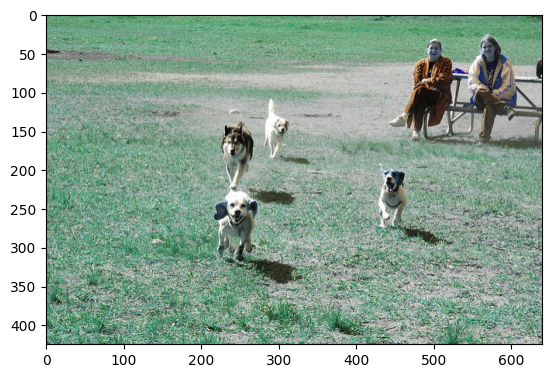

In [65]:
image2 = cv2.imread('/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg')
plt.imshow(image2); # BGR

In [66]:
image = skimage.io.imread('/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg') # RGB

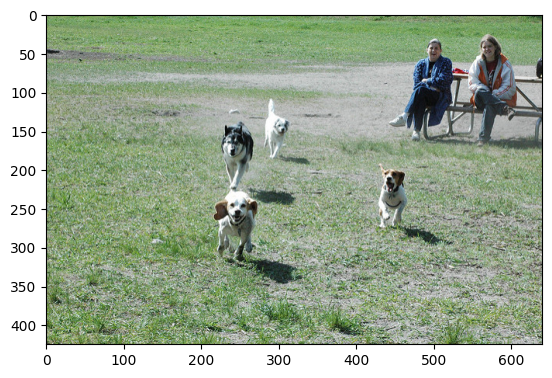

In [67]:
plt.imshow(image);

In [68]:
class_names[17], class_names[1], class_names[14]

('dog', 'person', 'bench')

In [69]:
results = network.detect([image], verbose=0)
results

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[{'rois': array([[195, 426, 277, 467],
         [226, 216, 321, 273],
         [106, 280, 189, 314],
         [ 32, 445, 159, 527],
         [136, 225, 231, 268],
         [ 27, 541, 168, 607],
         [ 75, 476, 164, 634]], dtype=int32),
  'class_ids': array([17, 17, 17,  1, 17,  1, 14], dtype=int32),
  'scores': array([0.9997004 , 0.9996582 , 0.9996049 , 0.99913245, 0.99799263,
         0.997436  , 0.9165011 ], dtype=float32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
       

In [70]:
r = results[0]

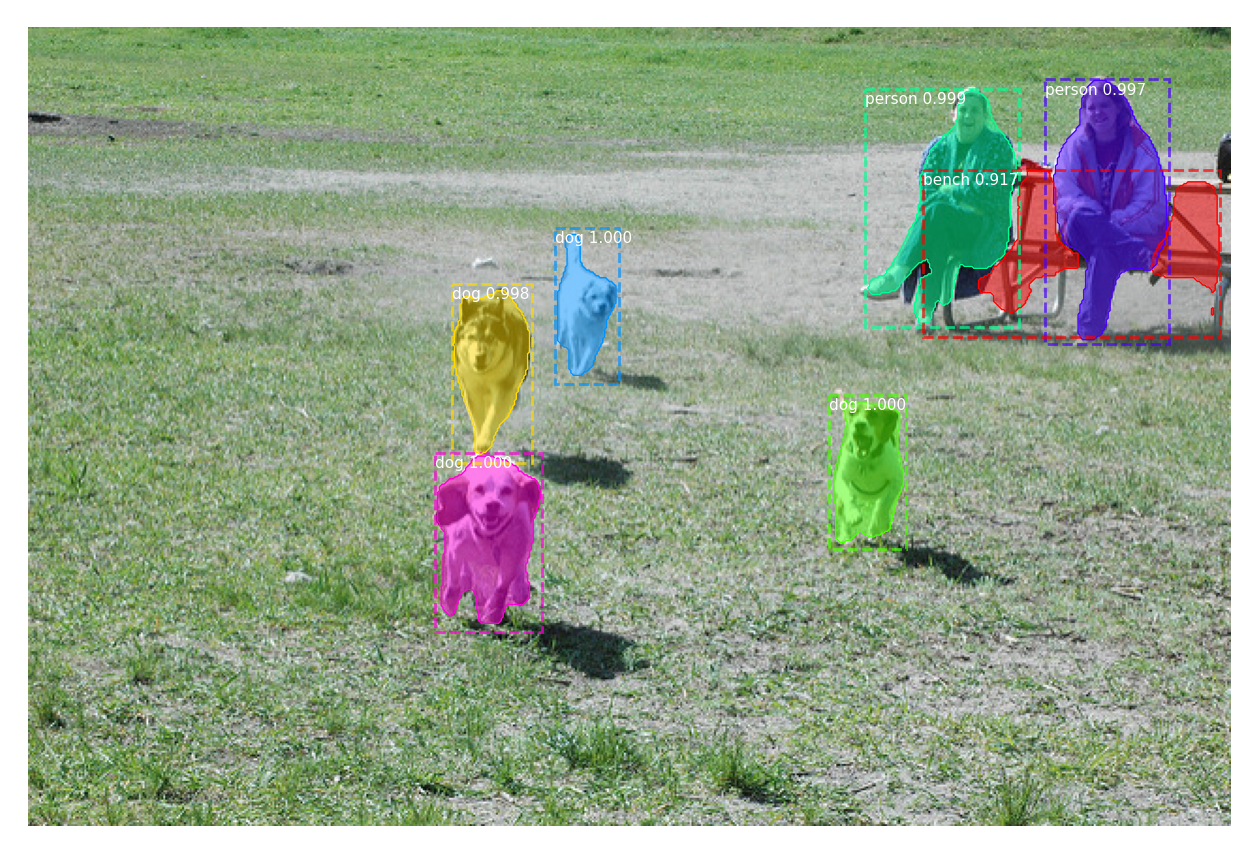

In [71]:
visualize.display_instances(image, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

## Removing the background

In [72]:
np.unique(r['masks'], return_counts=True)

(array([False,  True]), array([1881592,   22408]))

In [ ]:
r['masks']

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [73]:
def segment(image, r, index):
  mask = r['masks'][:,:,index]
  #print(mask)
  #print(mask.shape)

  mask = np.stack((mask,) * 3, axis = -1)
  #print(mask)
  #print(mask.shape)

  mask = mask.astype('uint8')
  #print(mask)
  bg = 255 - mask * 255
  #print(mask, mask.min(), mask.max())

  mask_show = np.invert(bg)
  #print(mask_show)
  mask_img = image * mask
  #print(mask_img)

  result = mask_img + bg
  return result, mask_show

In [74]:
image.shape, 425 * 640

((425, 640, 3), 272000)

In [75]:
segmentation, mask_obj = segment(image, r, 0)

In [76]:
segmentation

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [77]:
mask_obj

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [78]:
def show_segment(image, r, index, show_mask = False):
  segmentation, mask_obj = segment(image, r, index)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')
  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentation], axis = 1))
  else:
    plt.imshow(np.concatenate([image, segmentation], axis = 1))

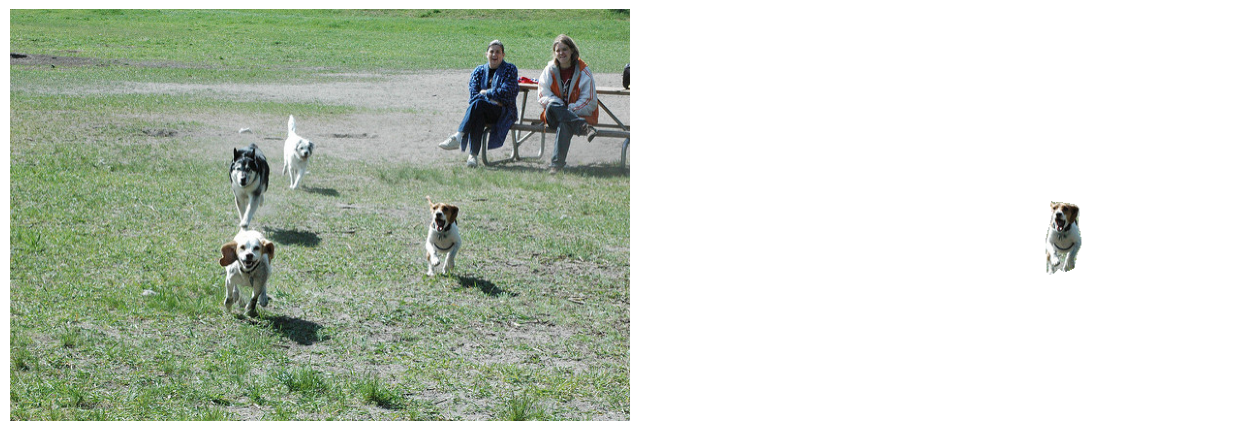

In [79]:
show_segment(image, r, 0, False)

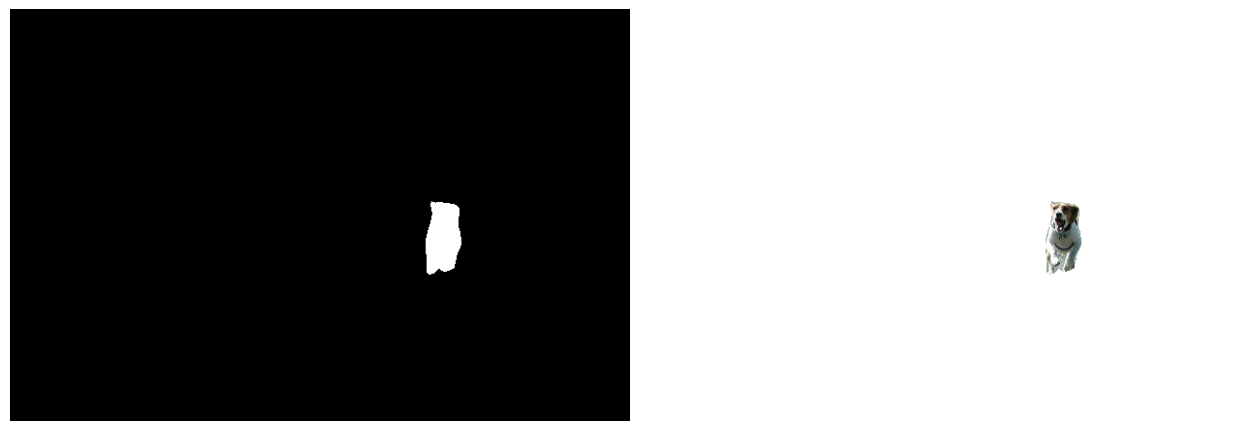

In [80]:
show_segment(image, r, 0, True)

In [81]:
r['rois'], len(r['rois'])

(array([[195, 426, 277, 467],
        [226, 216, 321, 273],
        [106, 280, 189, 314],
        [ 32, 445, 159, 527],
        [136, 225, 231, 268],
        [ 27, 541, 168, 607],
        [ 75, 476, 164, 634]], dtype=int32),
 7)

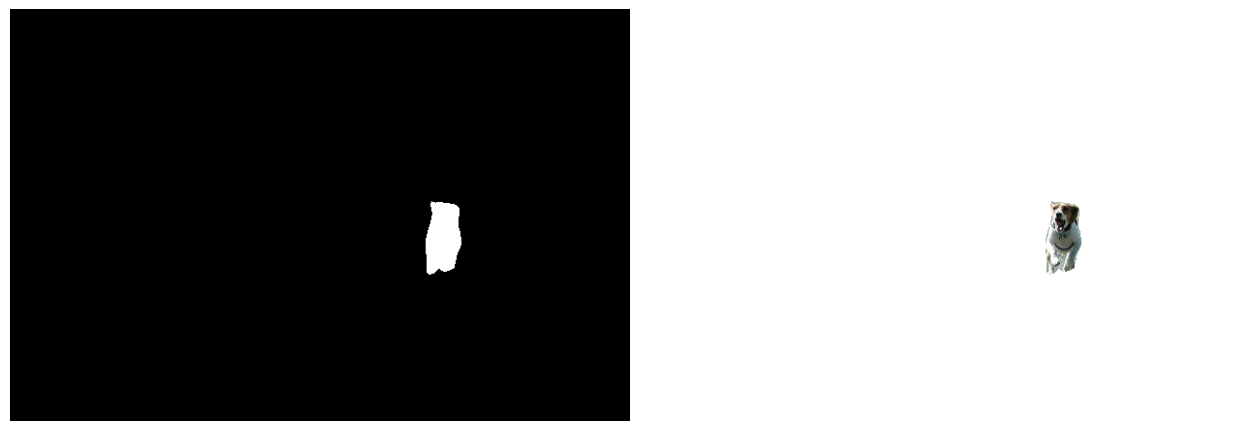

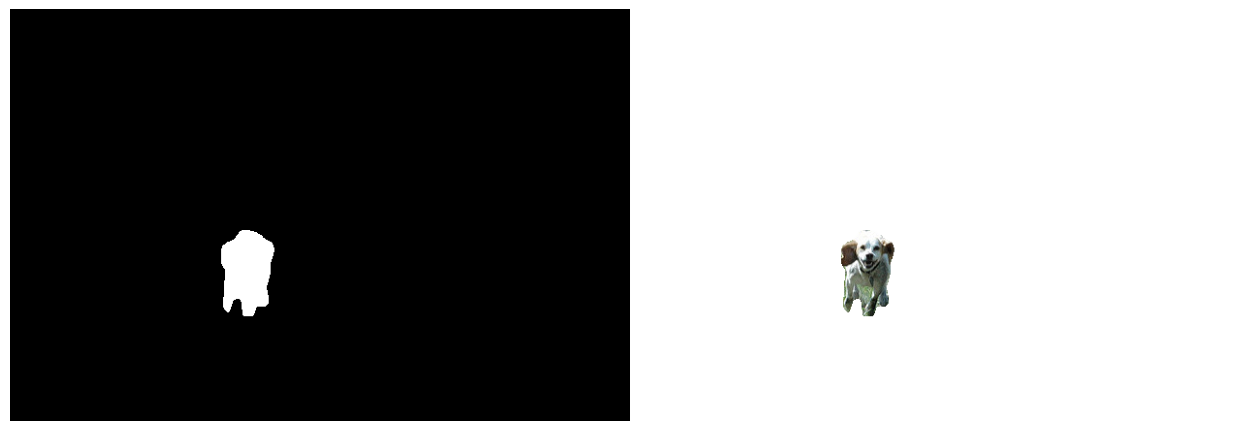

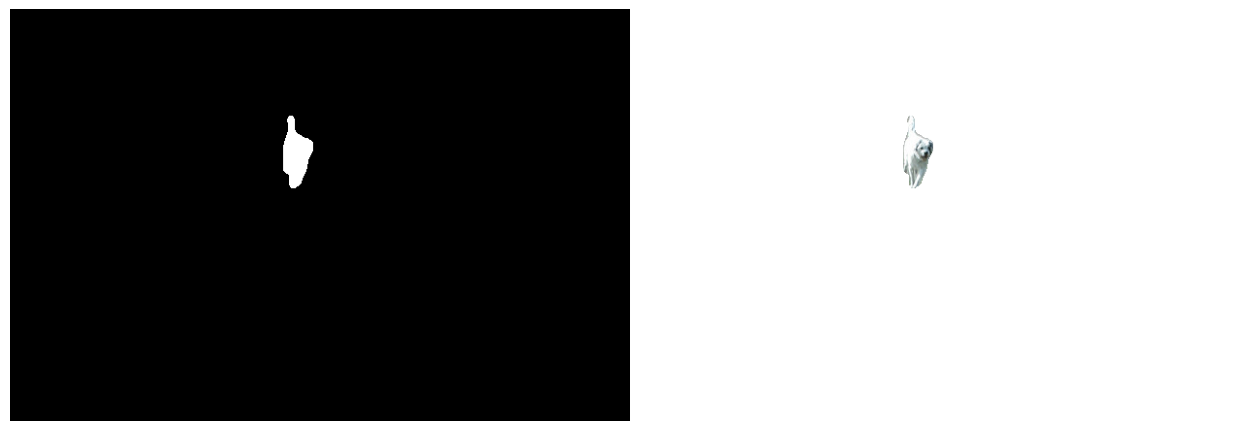

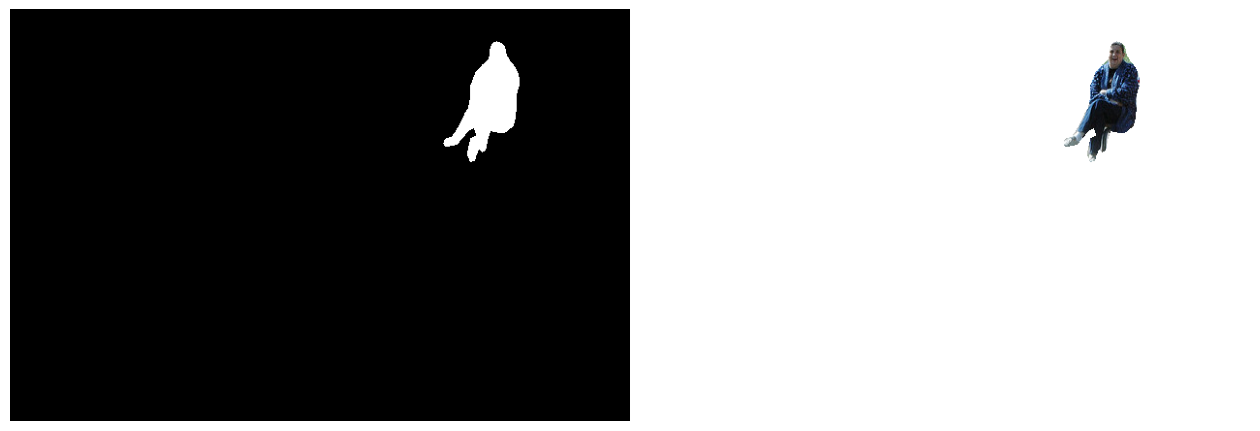

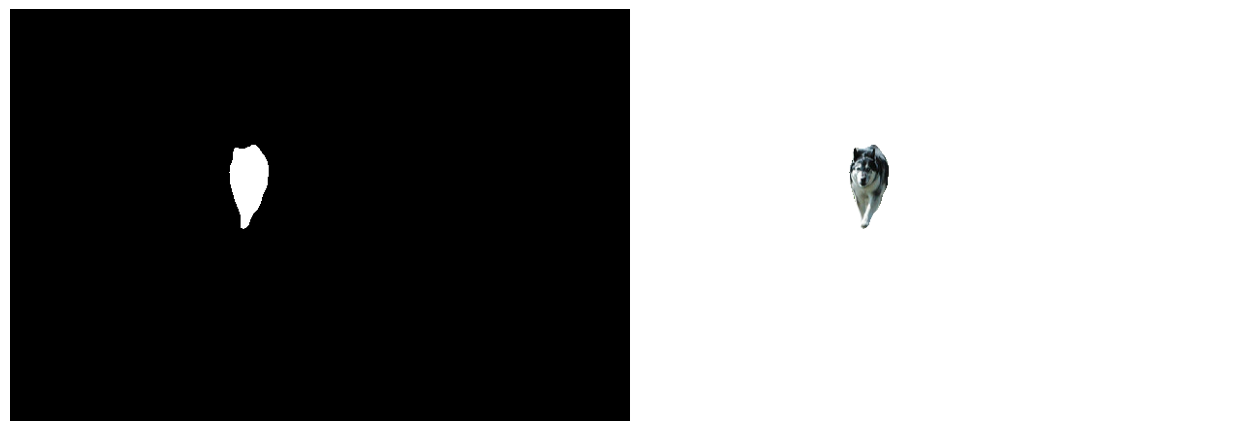

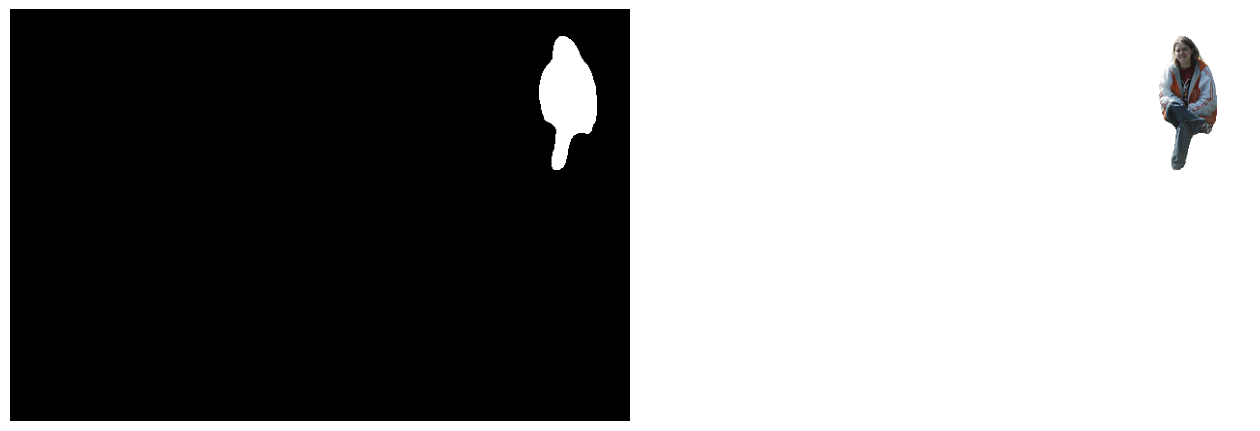

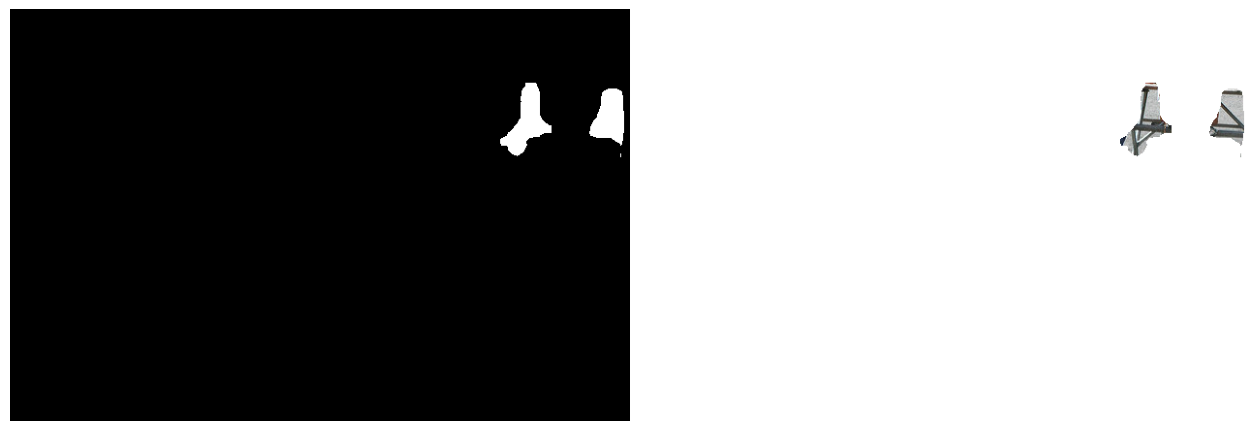

In [82]:
for index in range(len(r['rois'])):
  show_segment(image, r, index, True)